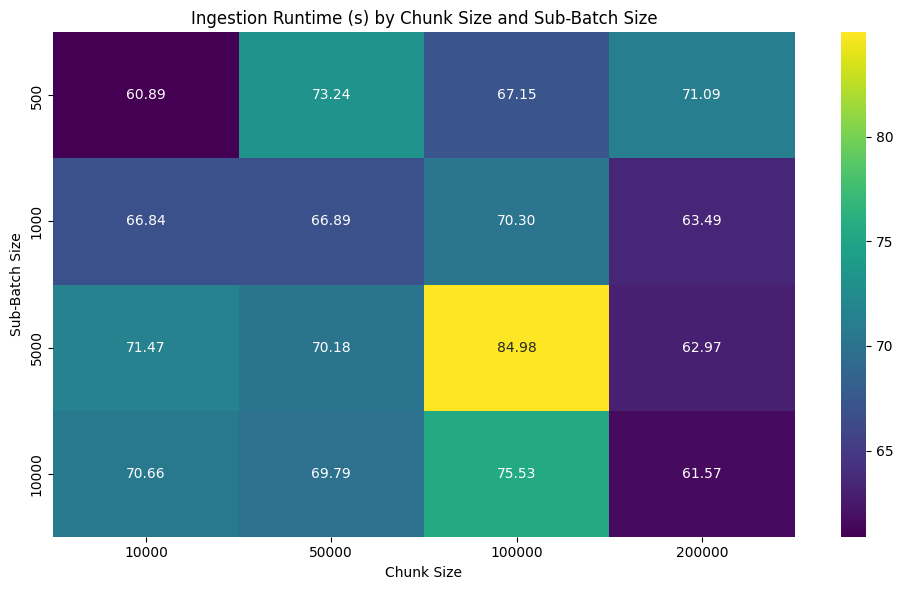

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Benchmark results: (chunk_size, sub_batch_size, runtime_s)
data = [
    (10000, 500, 60.89),
    (10000, 1000, 66.84),
    (10000, 5000, 71.47),
    (10000, 10000, 70.66),
    (50000, 500, 73.24),
    (50000, 1000, 66.89),
    (50000, 5000, 70.18),
    (50000, 10000, 69.79),
    (100000, 500, 67.15),
    (100000, 1000, 70.30),
    (100000, 5000, 84.98),
    (100000, 10000, 75.53),
    (200000, 500, 71.09),
    (200000, 1000, 63.49),
    (200000, 5000, 62.97),
    (200000, 10000, 61.57)
]

df = pd.DataFrame(data, columns=["chunk_size", "sub_batch_size", "time_s"])

# Pivot for heatmap (rows=sub_batch_size, columns=chunk_size)
pivot_table = df.pivot(index="sub_batch_size", columns="chunk_size", values="time_s")

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title("Ingestion Runtime (s) by Chunk Size and Sub-Batch Size")
plt.xlabel("Chunk Size")
plt.ylabel("Sub-Batch Size")
plt.tight_layout()
plt.show()


In [20]:
import zipfile
import os


def count_zip_rows(zip_file):
    """Counts rows in text files within a zip archive.

    Args:
        zip_file (str): Path to the zip file.

    Returns:
        dict: Dictionary with zip filename as key and row count as value.
    """
    row_counts = {}
    with zipfile.ZipFile(zip_file, "r") as zip:
        for info in zip.infolist():
            if not info.is_dir():  # Skip directories within the zip
                with zip.open(info.filename) as file:
                    # Replace this with logic to handle specific file formats (e.g., csv.reader)
                    row_counts[info.filename] = sum(1 for line in file)

    return row_counts


def list_and_count_zip_rows(folder_path):
    """Lists zip files in a folder and counts rows within each zip.

    Args:
        folder_path (str): Path to the folder containing zip files.

    Returns:
        list: List of dictionaries, each with zip filename and row count.
    """
    zip_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".zip"):
            zip_file_path = os.path.join(folder_path, filename)
            row_counts = count_zip_rows(zip_file_path)
            zip_count = {"filename": filename, "row_counts": row_counts}
            print(zip_count)
            zip_data.append(zip_count)

    return zip_data


# Example usage
folder_path = os.path.join(os.getcwd(), "..", "data", "DOWNLOAD_FILES")
zip_info = list_and_count_zip_rows(folder_path)

for item in zip_info:
    print(f"File: {item['filename']}")
    for filename, row_count in item["row_counts"].items():
        print(f"\t- {filename}: {row_count} rows")

{'filename': 'Socios1.zip', 'row_counts': {'K3241.K03200Y1.D40511.SOCIOCSV': 2019150}}
{'filename': 'Empresas9.zip', 'row_counts': {'K3241.K03200Y9.D40511.EMPRECSV': 4494860}}
{'filename': 'Empresas7.zip', 'row_counts': {'K3241.K03200Y7.D40511.EMPRECSV': 4494860}}
{'filename': 'Estabelecimentos3.zip', 'row_counts': {'K3241.K03200Y3.D40511.ESTABELE': 4753435}}
{'filename': 'Simples.zip', 'row_counts': {'F.K03200$W.SIMPLES.CSV.D40511': 39065196}}
{'filename': 'Estabelecimentos1.zip', 'row_counts': {'K3241.K03200Y1.D40511.ESTABELE': 4753435}}
{'filename': 'Paises.zip', 'row_counts': {'F.K03200$Z.D40511.PAISCSV': 255}}
{'filename': 'Empresas2.zip', 'row_counts': {'K3241.K03200Y2.D40511.EMPRECSV': 4494860}}
{'filename': 'Naturezas.zip', 'row_counts': {'F.K03200$Z.D40511.NATJUCSV': 90}}
{'filename': 'Socios0.zip', 'row_counts': {'K3241.K03200Y0.D40511.SOCIOCSV': 5976547}}
{'filename': 'Qualificacoes.zip', 'row_counts': {'F.K03200$Z.D40511.QUALSCSV': 68}}
{'filename': 'Municipios.zip', 'row_c

In [3]:
from collections import defaultdict
from eule import euler_keys

zip_info = sorted(zip_info, key=lambda x: x["filename"])

zip_filenames = list(map(lambda x: x["filename"], zip_info))


distances = dict()
for i, item in enumerate(zip_filenames):
    for j in range(i, len(zip_filenames)):
        pair = (zip_filenames[i], zip_filenames[j])
        distances[pair] = distance(pair[0], pair[1])

data_list = [set(k) for k, v in distances.items() if v == 0 or v == 1]

# Use defaultdict to avoid KeyErrors when encountering new elements
grouped_elements = defaultdict(set)
for element_set in data_list:
    for element in element_set:
        grouped_elements[element].update(
            element_set
        )  # Add all elements in the current set

euler_keys(grouped_elements)

ModuleNotFoundError: No module named 'eule'

In [43]:
!pip install eule

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.0/570.0 kB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.

[('Socios0.zip',
  'Socios1.zip',
  'Socios2.zip',
  'Socios3.zip',
  'Socios4.zip',
  'Socios5.zip',
  'Socios6.zip',
  'Socios7.zip',
  'Socios8.zip',
  'Socios9.zip'),
 ('Motivos.zip',),
 ('Empresas0.zip',
  'Empresas1.zip',
  'Empresas2.zip',
  'Empresas3.zip',
  'Empresas4.zip',
  'Empresas5.zip',
  'Empresas6.zip',
  'Empresas7.zip',
  'Empresas8.zip',
  'Empresas9.zip'),
 ('Estabelecimentos0.zip',
  'Estabelecimentos1.zip',
  'Estabelecimentos2.zip',
  'Estabelecimentos3.zip',
  'Estabelecimentos4.zip',
  'Estabelecimentos5.zip'),
 ('Municipios.zip',),
 ('Naturezas.zip',),
 ('Qualificacoes.zip',),
 ('Simples.zip',),
 ('Paises.zip',),
 ('Cnaes.zip',)]

In [5]:
!pip install python-json-logger python-dotenv sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [15]:
df

threadName,name,thread,created,process,processName,relativeCreated,module,funcName,levelno,msecs,pathname,lineno,asctime,message,filename,levelname,special,run
str,str,i64,f64,i64,str,f64,str,str,i64,f64,str,i64,str,str,str,str,null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",57.60932,"""logging""","""<module>""",20,8.0,"""/home/brunolne…",98,"""2024-06-04 16:…","""Logging starte…","""logging.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",985.435486,"""base""","""init_database""",20,936.0,"""/home/brunolne…",77,"""2024-06-04 16:…","""Connection to …","""base.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",1181.854725,"""etl""","""download_this_…",20,132.0,"""/home/brunolne…",53,"""2024-06-04 16:…","""Downloading fi…","""etl.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",1508.037567,"""etl""","""download_this_…",20,459.0,"""/home/brunolne…",70,"""2024-06-04 16:…","""Finished file …","""etl.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",1508.426905,"""etl""","""extract_this_z…",20,459.0,"""/home/brunolne…",99,"""2024-06-04 16:…","""Extracting fil…","""etl.py""","""INFO""",null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",1.7401e6,"""etl""","""download_this_…",20,27.0,"""/home/brunolne…",53,"""2024-06-04 16:…","""Downloading fi…","""etl.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",2.2517e6,"""etl""","""download_this_…",20,664.0,"""/home/brunolne…",70,"""2024-06-04 17:…","""Finished file …","""etl.py""","""INFO""",null,null
"""MainThread""","""setup.logging""",140470023856128,1.7175e9,26077,"""MainProcess""",2.2517e6,"""etl""","""extract_this_z…",20,665.0,"""/home/brunolne…",99,"""2024-06-04 17:…","""Extracting fil…","""etl.py""","""INFO""",null,null
